In [2]:
import pandas as pd
from sklearn import ensemble
%pylab inline
import numpy as np

Populating the interactive namespace from numpy and matplotlib


In [3]:
train=pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [4]:
train.ix[:0,:11]

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points
0,1,2596,51,3,258,0,510,221,232,148,6279


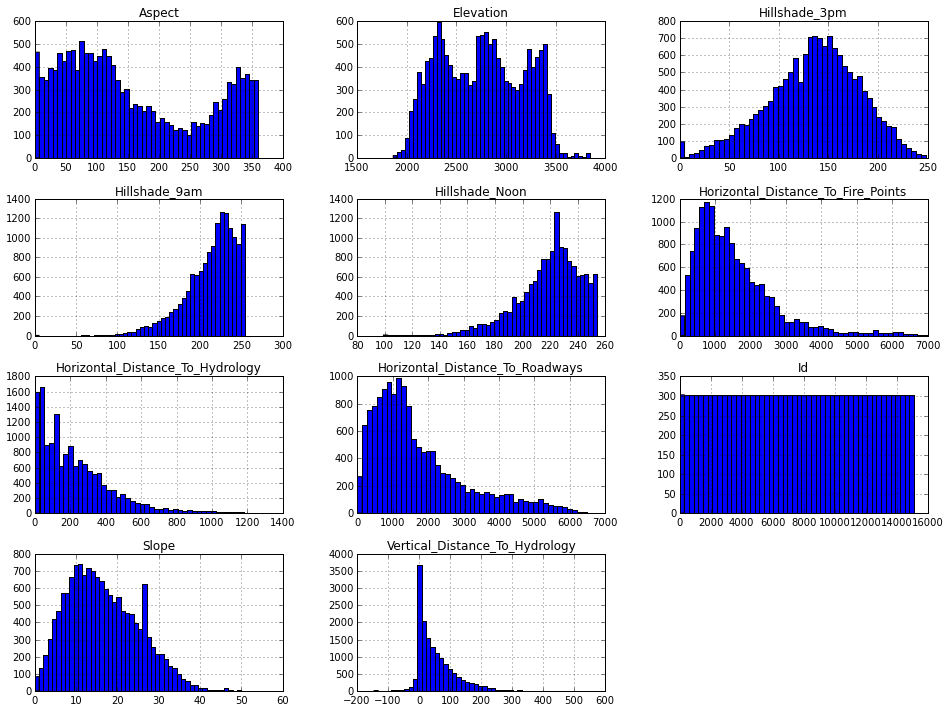

In [5]:
train.ix[:,:11].hist(figsize=(16,12),bins=50)
plt.show()

In [3]:
def r(x):
    if x+180>360:
        return x-180
    else:
        return x+180

train['Aspect2'] = train.Aspect.map(r)
test['Aspect2'] = test.Aspect.map(r)

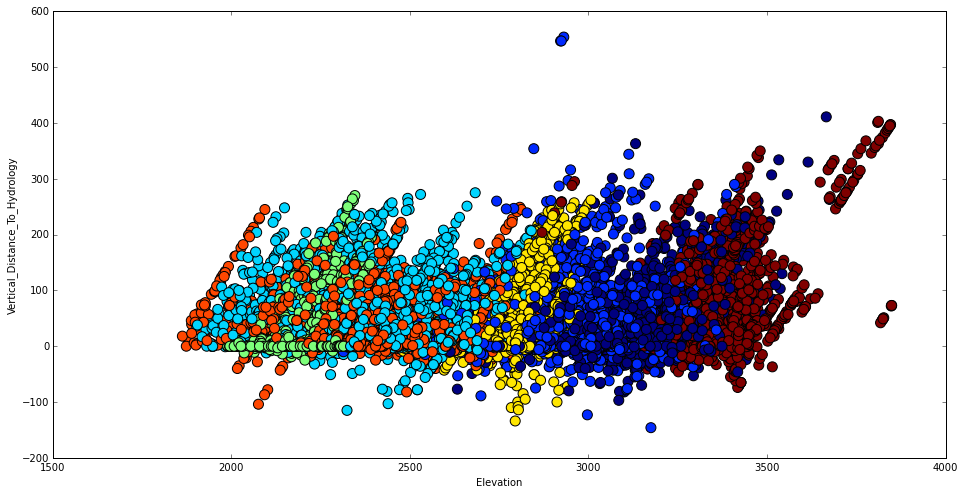

In [4]:
def plotc(c1,c2):

    fig = plt.figure(figsize=(16,8))
    sel = np.array(list(train.Cover_Type.values))

    plt.scatter(c1, c2, c=sel, s=100)
    plt.xlabel(c1.name)
    plt.ylabel(c2.name)
    
plotc(train.Elevation, train.Vertical_Distance_To_Hydrology)



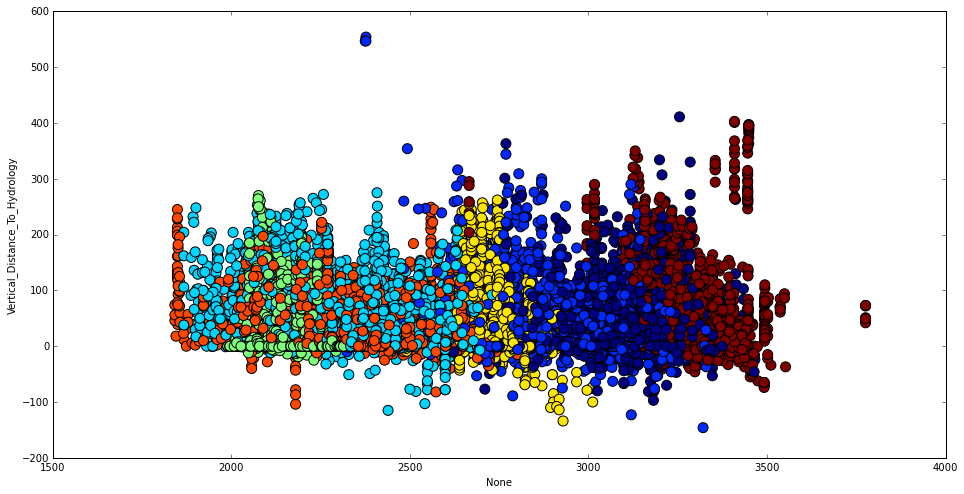

In [5]:
plotc(train.Elevation-train.Vertical_Distance_To_Hydrology, train.Vertical_Distance_To_Hydrology)

In [6]:


train['EVDtH'] = train.Elevation-train.Vertical_Distance_To_Hydrology
test['EVDtH'] = test.Elevation-test.Vertical_Distance_To_Hydrology

train['EHDtH'] = train.Elevation-train.Horizontal_Distance_To_Hydrology*0.2
test['EHDtH'] = test.Elevation-test.Horizontal_Distance_To_Hydrology*0.2



In [7]:
train['Distanse_to_Hydrolody'] = (train['Horizontal_Distance_To_Hydrology']**2+train['Vertical_Distance_To_Hydrology']**2)**0.5
test['Distanse_to_Hydrolody'] = (test['Horizontal_Distance_To_Hydrology']**2+test['Vertical_Distance_To_Hydrology']**2)**0.5

train['Hydro_Fire_1'] = train['Horizontal_Distance_To_Hydrology']+train['Horizontal_Distance_To_Fire_Points']
test['Hydro_Fire_1'] = test['Horizontal_Distance_To_Hydrology']+test['Horizontal_Distance_To_Fire_Points']

train['Hydro_Fire_2'] = abs(train['Horizontal_Distance_To_Hydrology']-train['Horizontal_Distance_To_Fire_Points'])
test['Hydro_Fire_2'] = abs(test['Horizontal_Distance_To_Hydrology']-test['Horizontal_Distance_To_Fire_Points'])

train['Hydro_Road_1'] = abs(train['Horizontal_Distance_To_Hydrology']+train['Horizontal_Distance_To_Roadways'])
test['Hydro_Road_1'] = abs(test['Horizontal_Distance_To_Hydrology']+test['Horizontal_Distance_To_Roadways'])

train['Hydro_Road_2'] = abs(train['Horizontal_Distance_To_Hydrology']-train['Horizontal_Distance_To_Roadways'])
test['Hydro_Road_2'] = abs(test['Horizontal_Distance_To_Hydrology']-test['Horizontal_Distance_To_Roadways'])

train['Fire_Road_1'] = abs(train['Horizontal_Distance_To_Fire_Points']+train['Horizontal_Distance_To_Roadways'])
test['Fire_Road_1'] = abs(test['Horizontal_Distance_To_Fire_Points']+test['Horizontal_Distance_To_Roadways'])

train['Fire_Road_2'] = abs(train['Horizontal_Distance_To_Fire_Points']-train['Horizontal_Distance_To_Roadways'])
test['Fire_Road_2'] = abs(test['Horizontal_Distance_To_Fire_Points']-test['Horizontal_Distance_To_Roadways'])

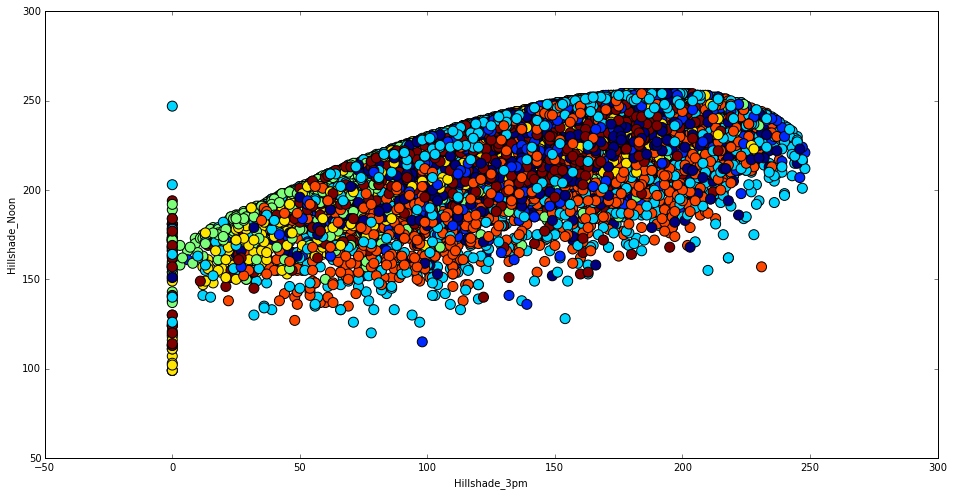

In [8]:
plotc(train.Hillshade_3pm, train.Hillshade_Noon)


In [8]:
feature_cols = [col for col in train.columns if col not in ['Cover_Type','Id']]

X_train = train[feature_cols]
X_test = test[feature_cols]
y = train['Cover_Type']
test_ids = test['Id']

forest = ensemble.ExtraTreesClassifier(n_estimators=400, criterion='gini', max_depth=None, 
    min_samples_split=2, min_samples_leaf=1, max_features='auto', 
    bootstrap=False, oob_score=False, n_jobs=-1, random_state=None, verbose=0, 
    min_density=None)

In [10]:
forest.fit(X_train, y)

#with open('features_engineering_benchmark.csv', "wb") as outfile:
#    outfile.write("Id,Cover_Type\n")
#    for e, val in enumerate(list(forest.predict(X_test))):
#        outfile.write("%s,%s\n"%(test_ids[e],val))

ExtraTreesClassifier(bootstrap=False, compute_importances=None,
           criterion='gini', max_depth=None, max_features='auto',
           max_leaf_nodes=None, min_density=None, min_samples_leaf=1,
           min_samples_split=2, n_estimators=400, n_jobs=-1,
           oob_score=False, random_state=None, verbose=0)

In [11]:
pd.DataFrame(forest.feature_importances_,index=X_train.columns).sort([0], ascending=False) [:20]

,0
EHDtH,0.093052
EVDtH,0.089610
Elevation,0.085667
Wilderness_Area4,0.039762
Horizontal_Distance_To_Roadways,0.035763
Fire_Road_1,0.035459
Hydro_Road_2,0.034247
Hydro_Road_1,0.034183
Hydro_Fire_1,0.030202
Horizontal_Distance_To_Fire_Points,0.029470


In [22]:
forest.score(X_train, y)

1.0

In [23]:
train.shape

(15120, 66)

In [24]:
test.shape

(565892, 65)

In [25]:
X_test.shape

(565892, 64)

In [11]:
pred=forest.predict(X_test)

In [27]:
pred.shape

(565892,)

###Score is 0.79301

In [29]:
sqrt(66)

8.1240384046359608

In [14]:
from sklearn import decomposition
pca=decomposition.PCA()

In [15]:
pca.fit(X_train)

PCA(copy=True, n_components=None, whiten=False)

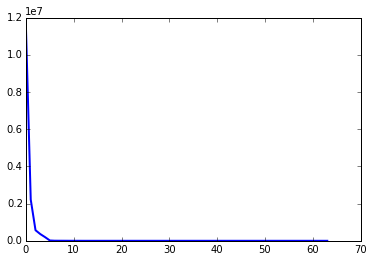

In [16]:
plot(pca.explained_variance_, linewidth=2)

In [ ]:
n_components = range(20,40,2)
Cs = logspace(8, 12, 5)
from sklearn.pipeline import Pipeline
from sklearn.grid_search import GridSearchCV
from sklearn import linear_model
logistic = linear_model.LogisticRegression(penalty='l1',fit_intercept='false')
pipe = Pipeline(steps=[('pca',pca), ('logistic', logistic)])
estimator = GridSearchCV(pipe, dict(pca__n_components=n_components, logistic__C=Cs))
estimator.fit(X_train, y)
estimator.best_estimator_

In [21]:
print range(2,20)

[2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]


In [12]:
X_train['south_face'] = [180 - a if a <=180 else a - 180  for a in X_train.Aspect]

/usr/local/lib/python2.7/site-packages/IPython/kernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [14]:
X_train['south_x_slope'] = X_train.south_face * X_train.Slope

/usr/local/lib/python2.7/site-packages/IPython/kernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [16]:
forest2 = ensemble.ExtraTreesClassifier(n_estimators=400, criterion='gini', max_depth=None, 
    min_samples_split=2, min_samples_leaf=1, max_features='auto', 
    bootstrap=False, oob_score=False, n_jobs=-1, random_state=None, verbose=0, 
    min_density=None)

forest2.fit(X_train, y)

ExtraTreesClassifier(bootstrap=False, compute_importances=None,
           criterion='gini', max_depth=None, max_features='auto',
           max_leaf_nodes=None, min_density=None, min_samples_leaf=1,
           min_samples_split=2, n_estimators=400, n_jobs=-1,
           oob_score=False, random_state=None, verbose=0)

In [18]:
X_train['south_face'][:5]

0    129
1    124
2     41
3     25
4    135
Name: south_face, dtype: int64

In [20]:
X_train['Aspect'][:5]

0     51
1     56
2    139
3    155
4     45
Name: Aspect, dtype: int64

In [22]:
X_test['south_face']= [180 - a if a <=180 else a - 180  for a in X_test.Aspect]
X_test['south_x_slope'] = X_test.south_face * X_test.Slope

/usr/local/lib/python2.7/site-packages/IPython/kernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/usr/local/lib/python2.7/site-packages/IPython/kernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from IPython.kernel.zmq import kernelapp as app


In [28]:
X_test = test[feature_cols]

In [24]:
X_test.ix[:0,:11]

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area1
0,2680,354,14,0,0,2684,196,214,156,6645,1


In [30]:
X_test2 = X_test.copy()
X_test2['south_face'] = [180 - a if a <=180 else a - 180  for a in X_test2.Aspect]
X_test2['south_x_slope'] = X_test2.south_face * X_test2.Slope

In [31]:
X_test.shape

(565892, 63)

In [32]:
X_test2.shape

(565892, 65)

In [33]:
test1=forest.predict(X_test)

In [34]:
test2=forest2.predict(X_test2)

In [35]:
diff=np.argwhere(test1 != test2)

In [36]:
diff

array([[    15],
       [    30],
       [    31],
       ..., 
       [564706],
       [565130],
       [565193]])

In [37]:
diff.shape

(20442, 1)

In [38]:
print test1[15]

1


In [39]:
test2[15]

2

(array([ 7379.,  8585.,  1146.,   133.,  1510.,   936.,   753.]),
 array([ 1.        ,  1.85714286,  2.71428571,  3.57142857,  4.42857143,
         5.28571429,  6.14285714,  7.        ]),
 <a list of 7 Patch objects>)

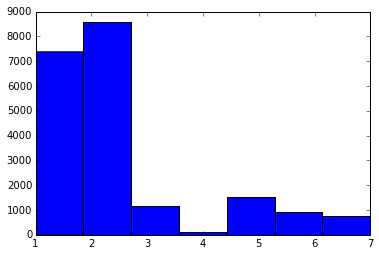

In [44]:
hist(test1[diff],bins=7)

In [42]:
np.amax(test1)

7

(array([ 6732.,  8305.,  1029.,   119.,  2261.,  1439.,   557.]),
 array([ 1.        ,  1.85714286,  2.71428571,  3.57142857,  4.42857143,
         5.28571429,  6.14285714,  7.        ]),
 <a list of 7 Patch objects>)

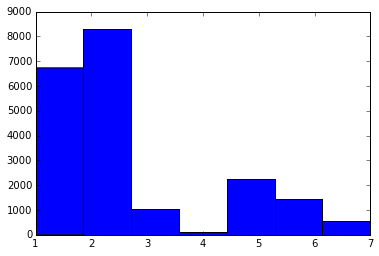

In [45]:
hist(test2[diff],bins=7)

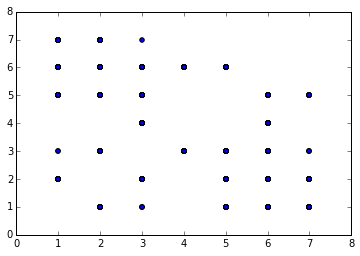

In [46]:
scatter(test1[diff],test2[diff])

In [47]:
with open('fe_south.csv', "wb") as outfile:
    outfile.write("Id,Cover_Type\n")
    for e, val in enumerate(list(forest2.predict(X_test2))):
        outfile.write("%s,%s\n"%(test_ids[e],val))

Takes score up to **0.80683**